### IMPORTING PACKAGES



In [2]:
from sklearn .datasets import fetch_california_housing
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [3]:
#THE MOST BASIC LEARNING FLOW IS .FIT AND .PREDICT SO THAT IS WHAT IS SHOWN IN THIS COLUMN
X,y = fetch_california_housing(return_X_y=True)
mod = KNeighborsRegressor().fit(X,y) 
pred = mod.predict(X)

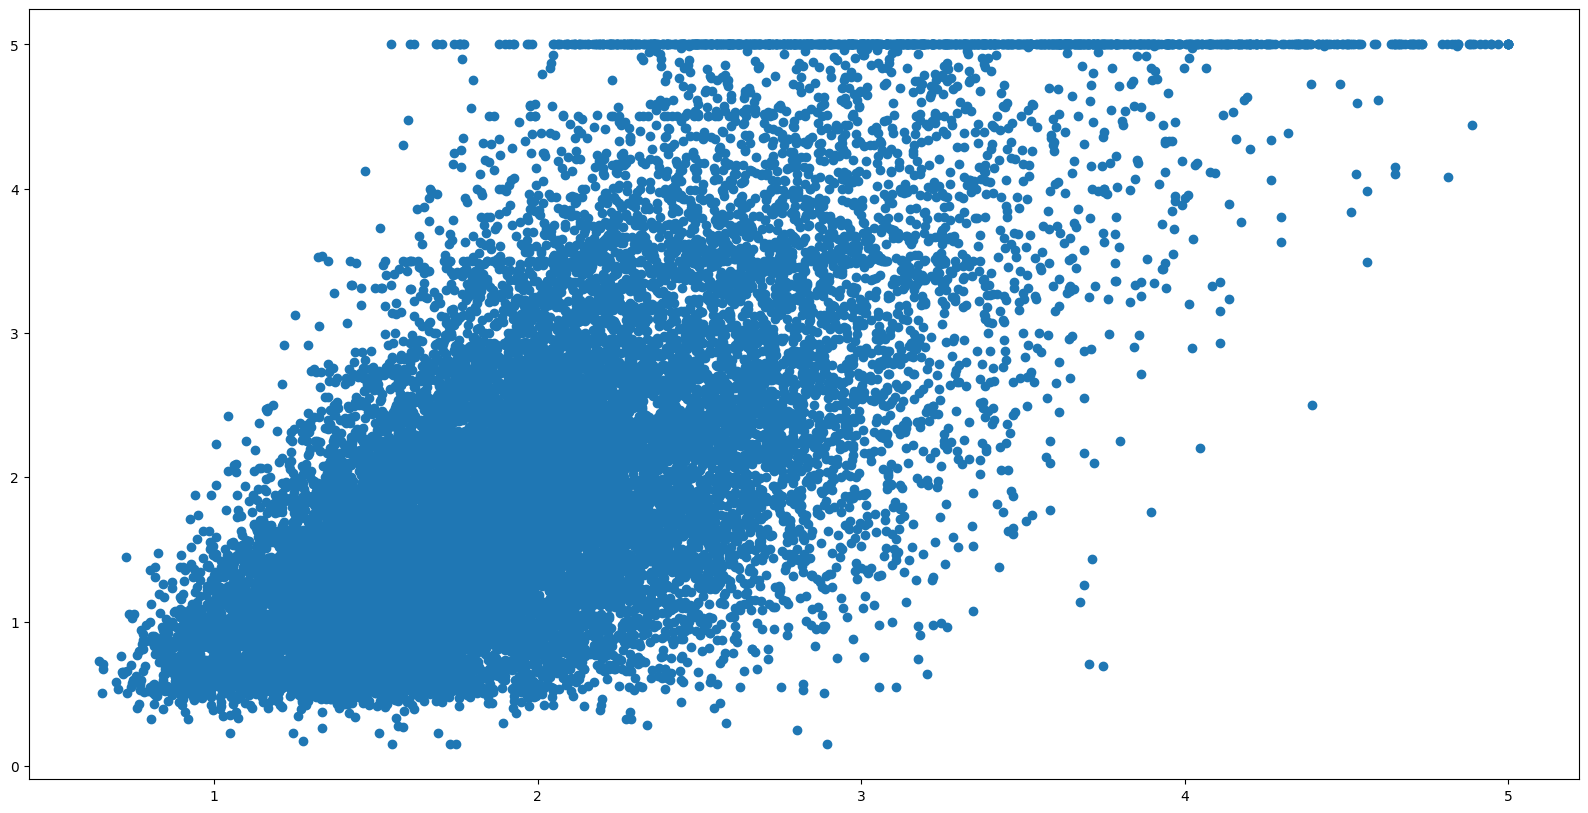

In [4]:
#GRAPH FOR SHOWING THE PREDICTIONS 
plt.figure(figsize=(20,10))
plt.scatter(pred, y)
plt.show()

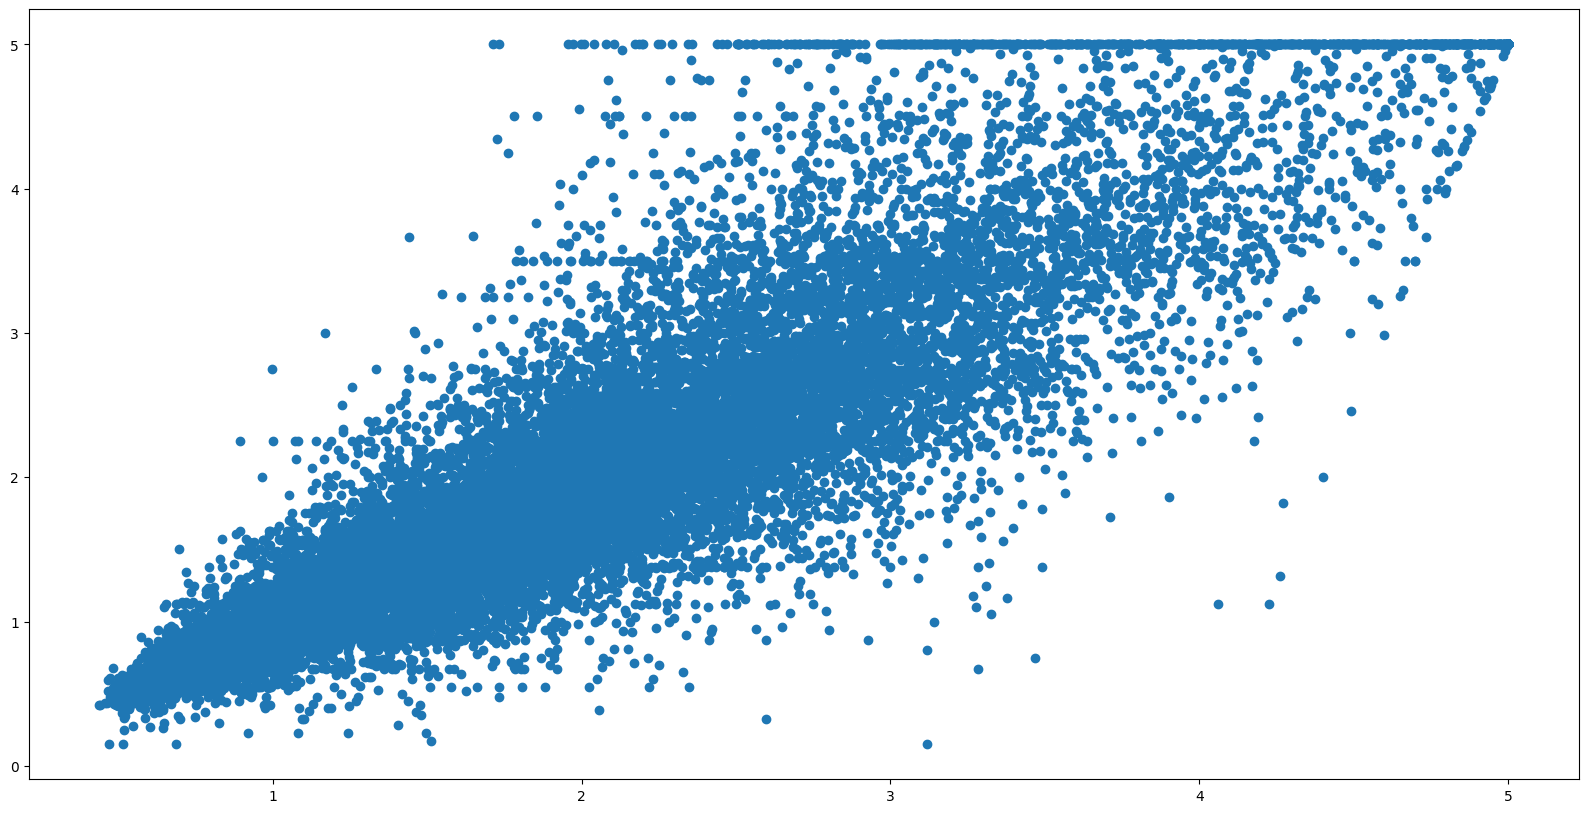

In [5]:
#WE HAVE CREATED A PIPELINE AND WE HAVE A DIFFRENET GRAPH BECAUSE OF THE PIPLELINE WHICH INCLUDES SCALING
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor())
])
pipe.fit(X,y)
pred = pipe.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(pred,y)


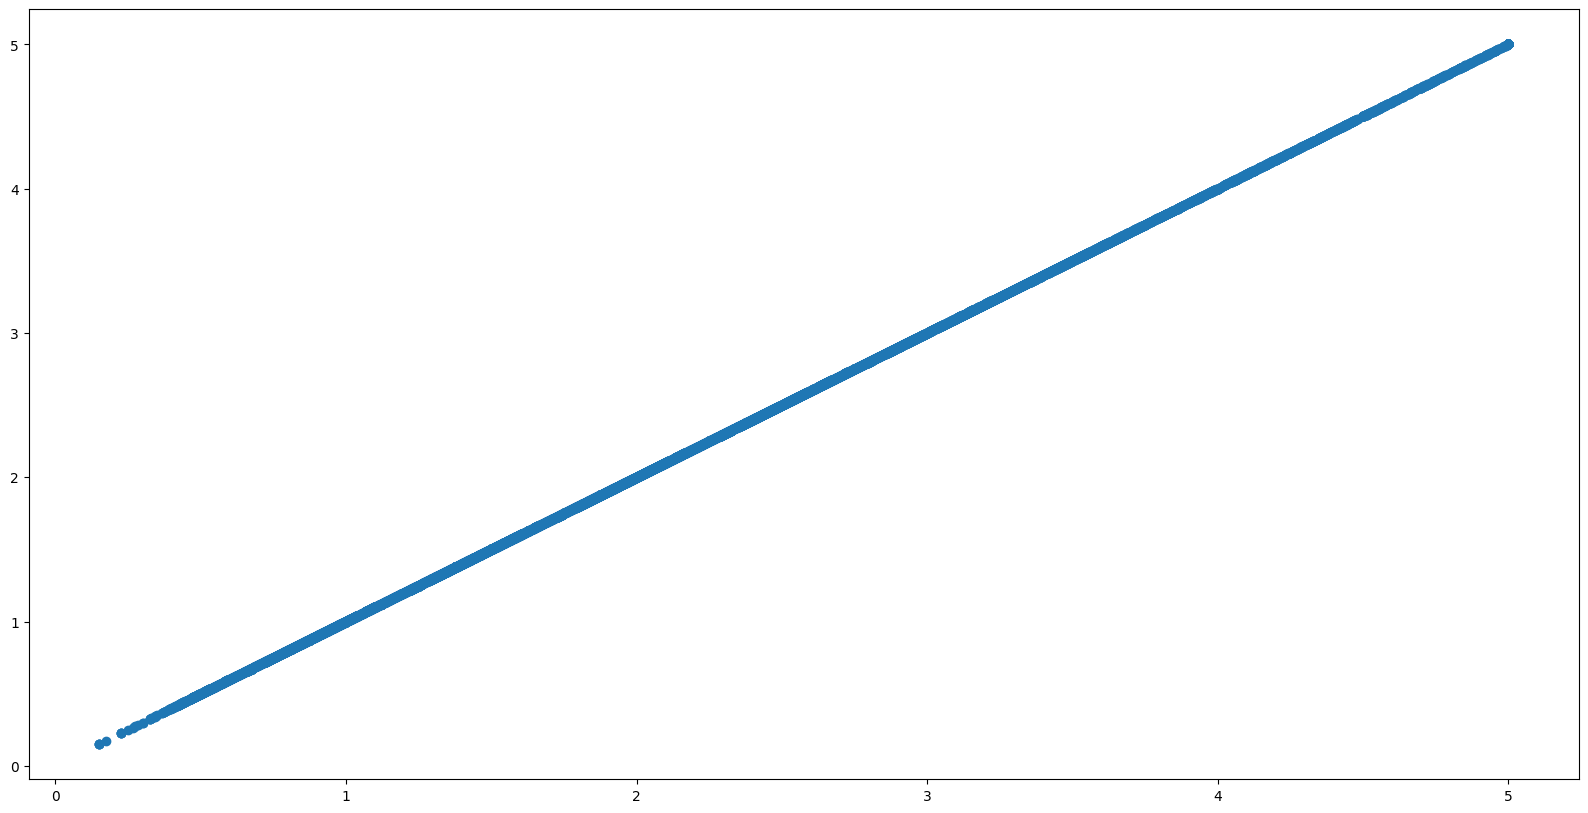

In [6]:
#FALSELY SUGGESSTING THAT IT IS MAKING PERFECT PREDICTION WHEN IT IS JUST TAKIN ITSELF AS ONE NEIGHBOUR
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])
pipe.fit(X,y)
pred = pipe.predict(X)
plt.figure(figsize=(20,10))
plt.scatter(pred,y)

In [7]:
#FALSELY SUGGESSTING THAT IT IS MAKING PERFECT PREDICTION WHEN IT IS JUST TAKIN ITSELF AS ONE NEIGHBOUR
mod = KNeighborsRegressor().fit(X,y)
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=1))
])
mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__n_neighbors":[1,2,3,4,5,7,8,9,10]},
                   cv=3)
mod.fit(X,y)
pd.DataFrame(mod.cv_results_)
#pipe_grams


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004099,0.000192,0.114117,0.009389,1,{'model__n_neighbors': 1},0.324068,0.334830,0.323371,0.327423,0.005245,9
1,0.003876,0.000160,0.131396,0.010591,2,{'model__n_neighbors': 2},0.468788,0.503457,0.424388,0.465544,0.032361,8
2,0.003975,0.000193,0.141008,0.009959,3,{'model__n_neighbors': 3},0.518547,0.543340,0.473595,0.511827,0.028867,7
3,0.004026,0.000271,0.157923,0.011167,4,{'model__n_neighbors': 4},0.540323,0.564974,0.499827,0.535041,0.026857,6
4,0.003863,0.000061,0.155301,0.011757,5,{'model__n_neighbors': 5},0.551149,0.579313,0.511781,0.547414,0.027696,5
5,0.003812,0.000028,0.164681,0.011911,7,{'model__n_neighbors': 7},0.564207,0.590509,0.525223,0.559979,0.026820,4
6,0.004257,0.000314,0.173582,0.011291,8,{'model__n_neighbors': 8},0.568637,0.593942,0.529337,0.563972,0.026580,3
7,0.003951,0.000051,0.174709,0.011095,9,{'model__n_neighbors': 9},0.571972,0.594863,0.529928,0.565588,0.026891,2
8,0.003807,0.000059,0.180002,0.012041,10,{'model__n_neighbors': 10},0.573760,0.595831,0.532973,0.567522,0.026038,1


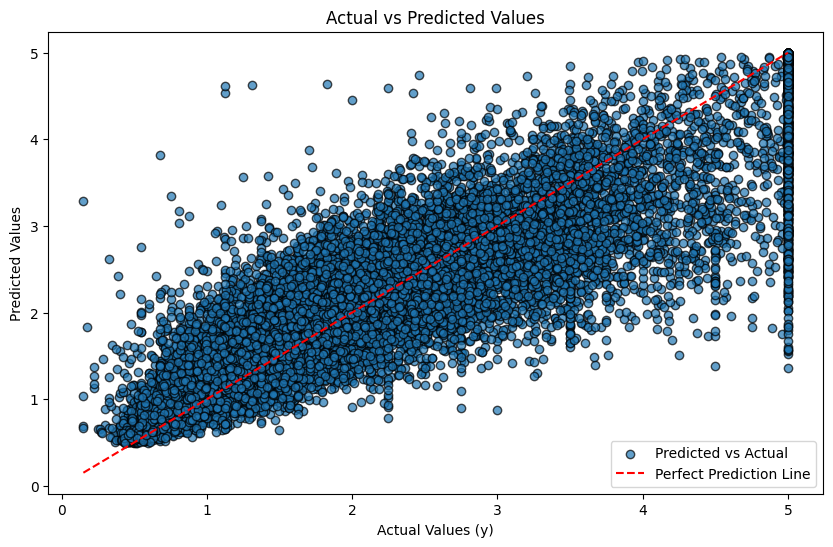

In [8]:
pred = mod.predict(X)

# Scatter plot to compare actual vs. predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, pred, alpha=0.7, edgecolors='k', label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label="Perfect Prediction Line")
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values (y)")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

In [9]:
print(fetch_california_housing()["DESCR"])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

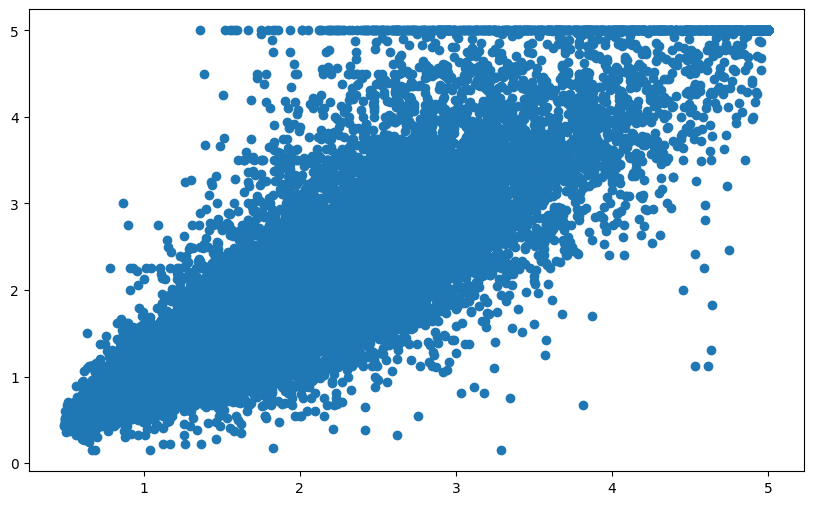

In [18]:

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model",KNeighborsRegressor(n_neighbors=8))
])
mod = GridSearchCV(estimator=pipe,
                   param_grid={"model__n_neighbors":[1,2,3,4,5,7,8,9,10]},
                   cv=3)
mod.fit(X,y)
pred = mod.predict(X)
plt.figure(figsize=(10, 6))
plt.scatter(pred,y)

In [19]:
# Generate predictions for the training data (X)
pred = mod.predict(X)

# Print the first few predicted values
print(pred[:10])  # Display the first 10 predicted prices

# Alternatively, if you want to view predictions alongside the actual values:
import pandas as pd
predictions_df = pd.DataFrame({"Actual": y, "Predicted": pred})
print(predictions_df.head(10))  # Display the first 10 actual vs predicted values


[4.784107 4.326802 4.355605 3.964403 2.3627   2.785801 3.154801 2.3885
 1.2569   3.084   ]
   Actual  Predicted
0   4.526   4.784107
1   3.585   4.326802
2   3.521   4.355605
3   3.413   3.964403
4   3.422   2.362700
5   2.697   2.785801
6   2.992   3.154801
7   2.414   2.388500
8   2.267   1.256900
9   2.611   3.084000
